# Linear Regression Analysis - BASELINE

## Setup

In [18]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import shap

%matplotlib inline 

In [2]:
# Load data
data = pd.read_csv('data/ames_lr.csv')

In [3]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [4]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)


GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
Remod
YrSoldLessBuilt
YrSoldLessRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighbo

## Split Data into Train-Test Sets

In [5]:
# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [6]:
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,0,1,0,0,0,0,0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train.head()

1138    231500
411     141000
2301    155500
1697    191000
1347    332000
Name: SalePrice, dtype: int64

## Data Prep and Feature Selection for Train Set

Linear Regression has several key assumptions:
1. **Linearity** - there should be a linear relationship between the independent (predictor) variables and the dependent (response) variable
2. **Independence of Errors** - residuals should be independent of each other with no correlation
3. **Homoscedasticity** - residuals should have constant variance across the range of predicted values
4. **Normality of errors** - residuals should be approximiately normally distributed
5. **No or little multicollinearity** - independent variables should not be highly correlated with each other

From our EDA, we already know that the full dataset has signifiicant multicollinearity.  As a result, we will build the feature set "bottoms up."  We'll use some common "conventional wisdom" features.  See: https://www.opendoor.com/articles/factors-that-influence-home-value

In [8]:
# Create linear regression object
lr = LinearRegression()

# 'Crisis' - show linear regression for Crisis
lr.fit(X_train[['Crisis']], y_train)
print("Crisis R^2 score: ", lr.score(X_train[['Crisis']], y_train))

# 'GrLivArea' - show linear regression for GrLivArea
lr.fit(X_train[['GrLivArea']], y_train)
print("GrLivArea R^2 score: ", lr.score(X_train[['GrLivArea']], y_train))

# 'Neighborhood' - show linear regression for encoded Neighborhood
neighborhood_columns = [col for col in predictors.columns if col.startswith('Neighborhood')]
lr.fit(X_train[neighborhood_columns], y_train)
print("Neighborhood (one-hot encoded) R^2 score: ", lr.score(X_train[neighborhood_columns], y_train))

# 'OverallQual' - show linear regression for OverallQual
lr.fit(X_train[['OverallQual']], y_train)
print("OverallQual R^2 score: ", lr.score(X_train[['OverallQual']], y_train))

# 'YrSoldLessBuilt' - show linear regression for YrSoldLessBuilt
lr.fit(X_train[['YrSoldLessBuilt']], y_train)
print("YrSoldLessBuilt R^2 score: ", lr.score(X_train[['YrSoldLessBuilt']], y_train))

# 'YrSoldLessRemod' - show linear regression for YrSoldLessRemod
lr.fit(X_train[['YrSoldLessRemod']], y_train)
print("YrSoldLessRemod R^2 score: ", lr.score(X_train[['YrSoldLessRemod']], y_train))

Crisis R^2 score:  2.959294342286256e-05
GrLivArea R^2 score:  0.5254389934847536
Neighborhood (one-hot encoded) R^2 score:  0.5658084091604905
OverallQual R^2 score:  0.6286470107557833
YrSoldLessBuilt R^2 score:  0.2945733578968881
YrSoldLessRemod R^2 score:  0.2609011260250347


In [9]:
# Gather selected features for training set
X_train = pd.concat([X_train[['Crisis']],
                     X_train[['GrLivArea']],
                     X_train[neighborhood_columns],
                     X_train[['OverallQual']],
                     X_train[['YrSoldLessBuilt']],
                     X_train[['YrSoldLessRemod']]],
                     axis=1)

print(X_train.columns)

Index(['Crisis', 'GrLivArea', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'OverallQual', 'YrSoldLessBuilt',
       'YrSoldLessRemod'],
      dtype='object')


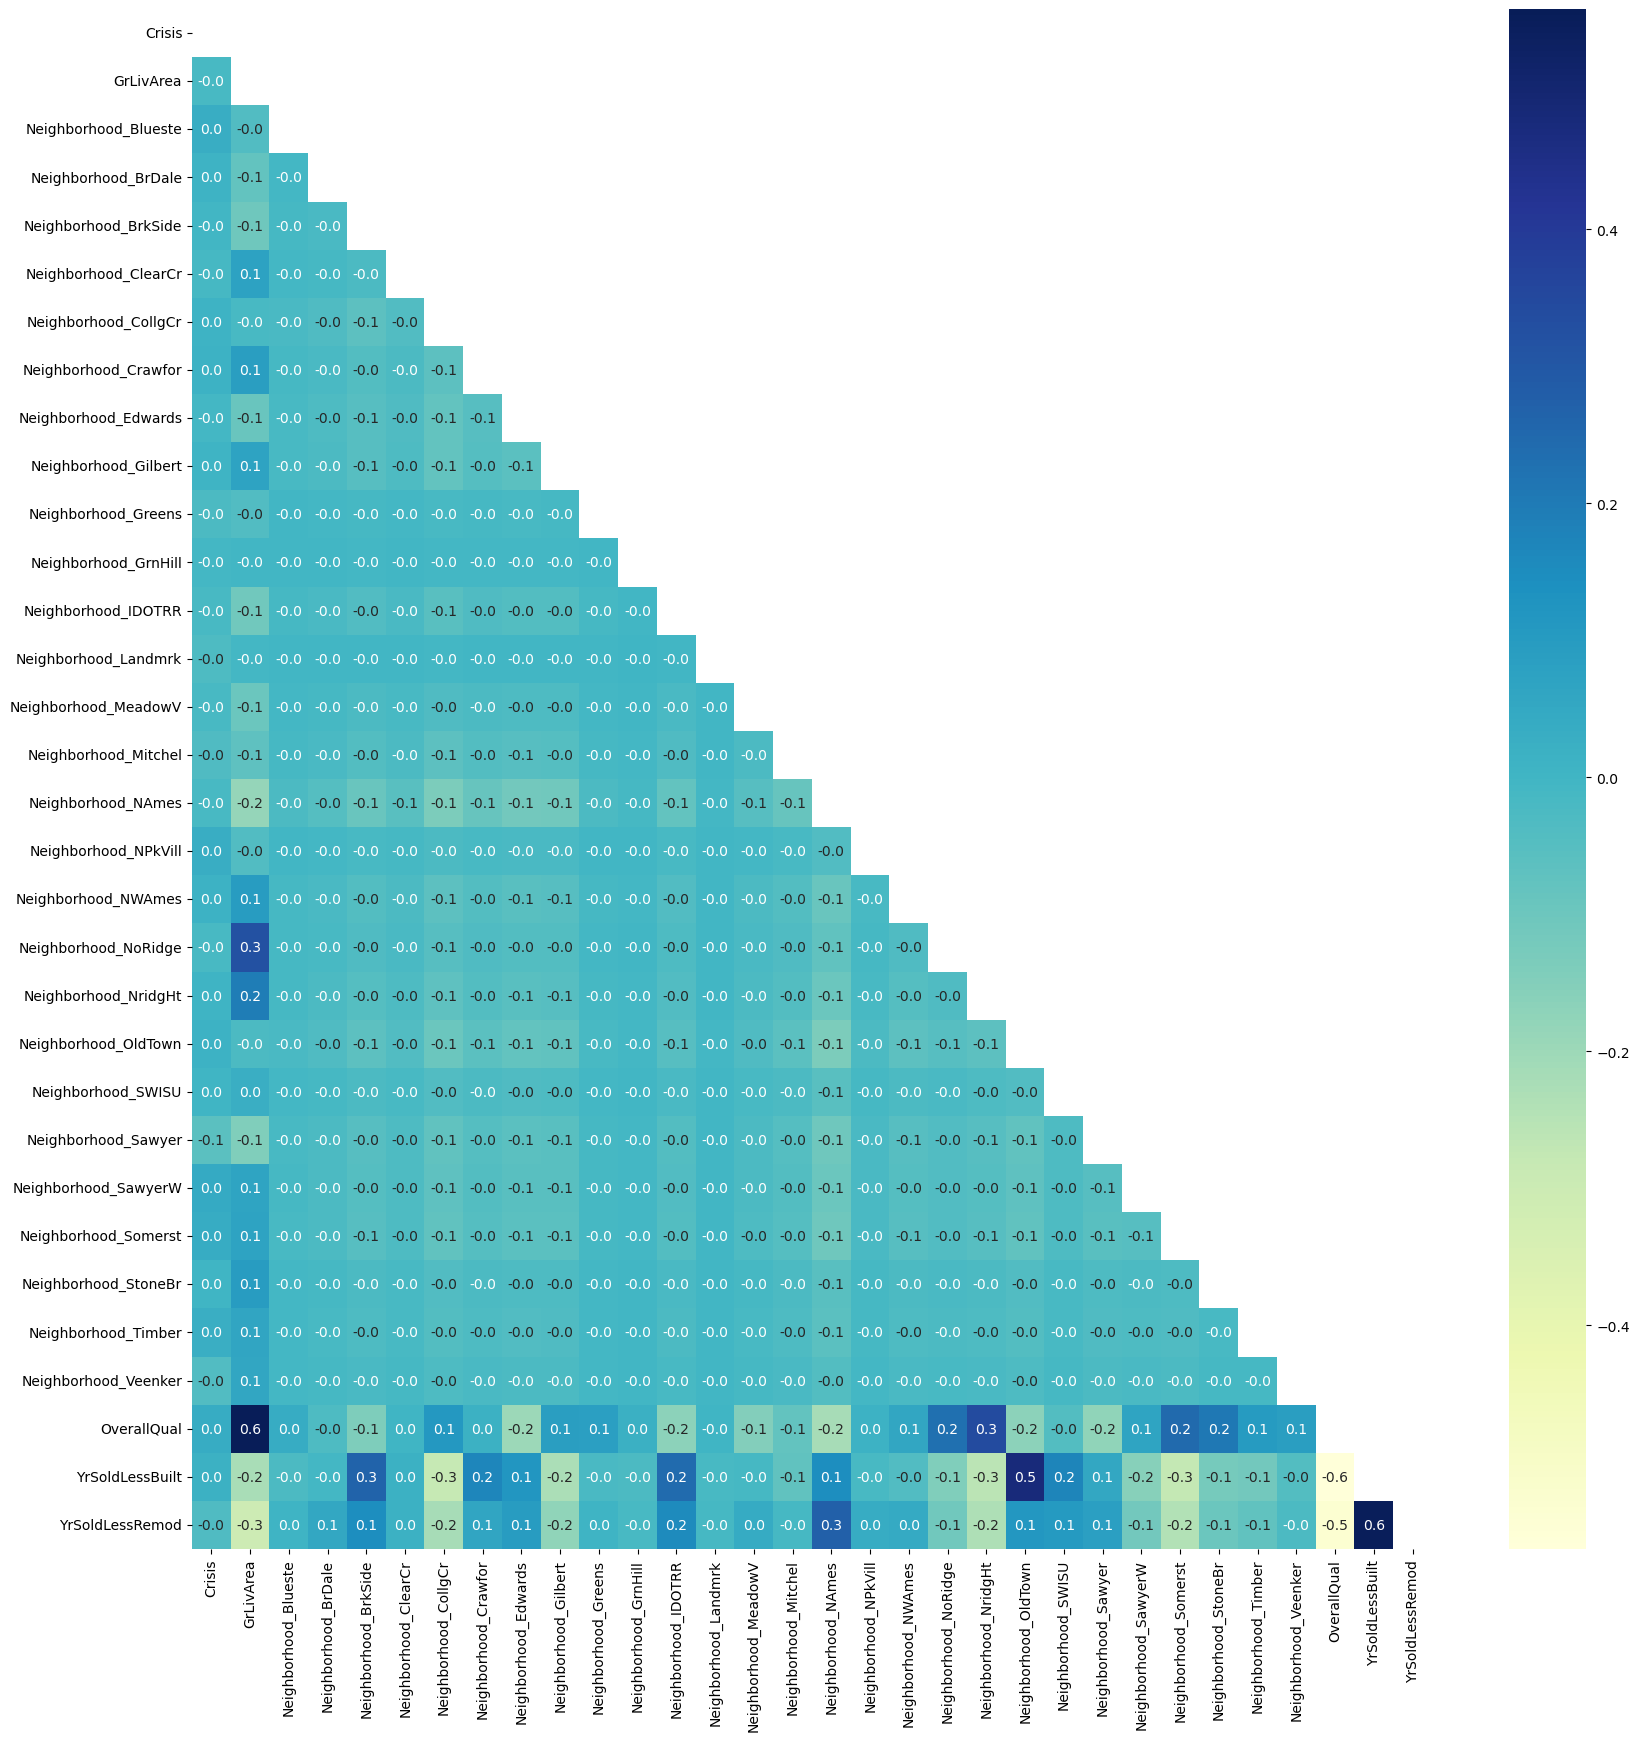

In [10]:
# Plot the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask to hide upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the figure
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1f', cmap = 'YlGnBu')

# Show the plot
plt.show()

In [11]:
# Calculate the VIF for each feature in the selected_features DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i)
              for i in range(X_train.shape[1])]

# Add the feature names to the VIF DataFrame
vif['Feature'] = X_train.columns

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF DataFrame
print(vif)

          VIF               Feature
29  44.214237           OverallQual
1   18.150125             GrLivArea
30  12.912023       YrSoldLessBuilt
16   9.033066    Neighborhood_NAmes
21   7.355494  Neighborhood_OldTown
6    4.696484  Neighborhood_CollgCr
31   4.269865       YrSoldLessRemod
8    3.862987  Neighborhood_Edwards
4    3.794467  Neighborhood_BrkSide
25   3.760579  Neighborhood_Somerst
20   3.731303  Neighborhood_NridgHt
7    3.629191  Neighborhood_Crawfor
9    3.373758  Neighborhood_Gilbert
18   3.273142   Neighborhood_NWAmes
23   3.265662   Neighborhood_Sawyer
24   3.042118  Neighborhood_SawyerW
12   2.973229   Neighborhood_IDOTRR
0    2.778141                Crisis
19   2.768864  Neighborhood_NoRidge
15   2.474535  Neighborhood_Mitchel
22   2.201089    Neighborhood_SWISU
27   1.991472   Neighborhood_Timber
26   1.965055  Neighborhood_StoneBr
5    1.876952  Neighborhood_ClearCr
28   1.557108  Neighborhood_Veenker
3    1.543186   Neighborhood_BrDale
14   1.413882  Neighborhood_

Multicollinearity has improved, but we still have some high values, so the caveat is that the model's predictions may not be reliable.  We'll address this via regularization in later modules.

## Data Prep and Feature Selection for Test Set

In [12]:
# Gather selected features for test set
X_test = pd.concat([X_test[['Crisis']],
                    X_test[['GrLivArea']],
                    X_test[neighborhood_columns],
                    X_test[['OverallQual']],
                    X_test[['YrSoldLessBuilt']],
                    X_test[['YrSoldLessRemod']]],
                    axis=1)

print(X_test.columns)   

Index(['Crisis', 'GrLivArea', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'OverallQual', 'YrSoldLessBuilt',
       'YrSoldLessRemod'],
      dtype='object')


## Train Model

In [13]:
# Use cross-validation on train data
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cross_val_scores)}")

Average 5-Fold CV Score: 0.8124424179320903


In [14]:
# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [15]:
# Display the metrics
print('R^2 on test set is equal to %.3f' %(lr.score(X_test, y_test)))
print('The intercept is equal to %.3f' %(lr.intercept_))
print('The slopes are %s' %(lr.coef_))

R^2 on test set is equal to 0.810
The intercept is equal to -14850.428
The slopes are [ 9.84963471e+02  6.00287014e+01 -1.49179712e+04 -2.62440973e+04
  1.37853567e+04  3.29763257e+04  8.70724762e+03  3.61884922e+04
  8.39267831e+03 -4.56115389e+03  1.09681241e+04  9.28487208e+04
  4.31146054e+03 -2.80156054e+04 -9.39340977e+03  1.34087420e+04
  1.40482054e+04 -1.41320682e+04  5.42874220e+03  5.28974106e+04
  6.28965388e+04  3.17595975e+03 -5.95050771e+03  1.53824815e+04
 -3.56112064e+02  1.39961126e+04  6.47093195e+04  3.51770409e+04
  4.52251864e+04  1.81492762e+04 -4.17153590e+02 -2.37042706e+02]


Text(0.5, 1.0, 'Distribution of Residuals')

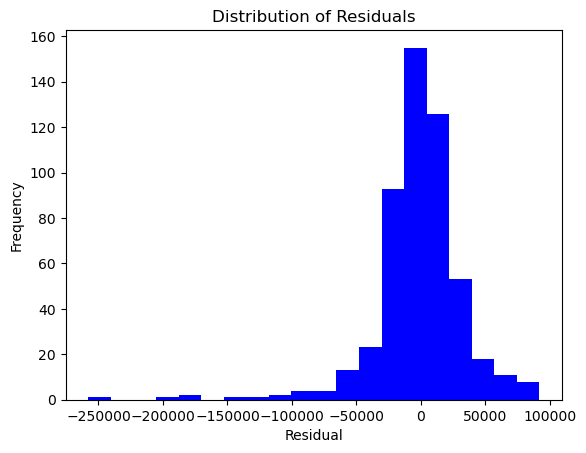

In [16]:
# Plot Distribution of Residuals

# Calculate the predictions on the test set
predictions = lr.predict(X_test)

# Calculate the residuals
residuals = predictions - y_test

# Plot a histogram of the residuals
plt.hist(residuals, bins=20, color='blue')

# Labels and title
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

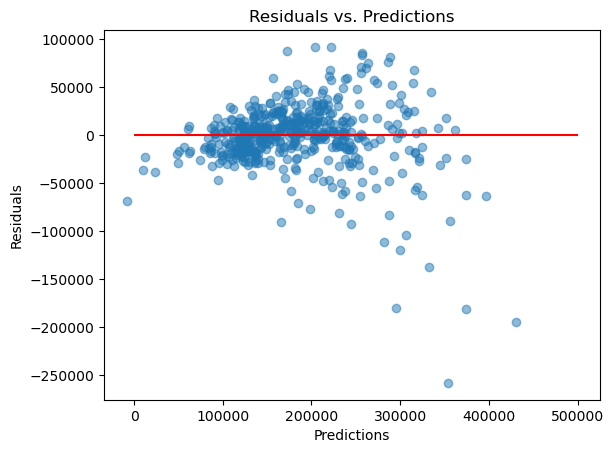

In [17]:
# Plot Residuals vs. Predictions

# Create the plot
plt.scatter(predictions, residuals, alpha=0.5)

# Labels and title
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')

# Draw a horizontal line at y = 0
plt.hlines(y=0, xmin=0, xmax=500000, color='red')

# Show the plot
plt.show()

## Shapley Values

In [20]:
# Compute the SHAP values for the linear model
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_train)

In [21]:
# Summarize the SHAP values in a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)

In [22]:
shap_df

,Crisis,GrLivArea,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallQual,YrSoldLessBuilt,YrSoldLessRemod
0,295.489041,10393.369361,-0.0,-0.0,-413.5607,0.0,7575.305432,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,13430.464356,10216.091410,3366.006427
1,295.489041,-45313.265543,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,364.892311,...,178.515231,14613.357446,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,-22868.087958,-6887.205765,-6352.744523
2,-689.474430,-1432.284816,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,-4718.811801,-24824.810119,-8249.086172
3,295.489041,4390.499221,-0.0,-0.0,-413.5607,0.0,7575.305432,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,13430.464356,7713.169872,2180.792896
4,295.489041,6071.302860,-0.0,-0.0,-413.5607,0.0,7575.305432,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,49729.016671,12719.012948,4788.262663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,295.489041,428.604928,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,13430.464356,11050.398589,4077.134545
2056,295.489041,-892.026503,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,-4196.261582,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,-4718.811801,8547.477051,2654.878308
2057,295.489041,-13798.197305,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,13430.464356,-13144.509609,995.579366
2058,295.489041,-45313.265543,-0.0,-0.0,-413.5607,0.0,-1131.942191,-1447.539688,-503.560699,364.892311,...,178.515231,-769.124076,17.805603,-979.727882,-1941.279584,-1055.311226,-452.251864,-22868.087958,-4384.284227,-4930.488287


In [23]:
# Get the mean absolute SHAP value for each feature
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

In [24]:
# Print the top 5 features
print(mean_shap_values.head(5))

GrLivArea               24222.154495
OverallQual             20421.283601
YrSoldLessBuilt         10355.445009
Neighborhood_NridgHt     5700.380487
YrSoldLessRemod          4314.269306
dtype: float64


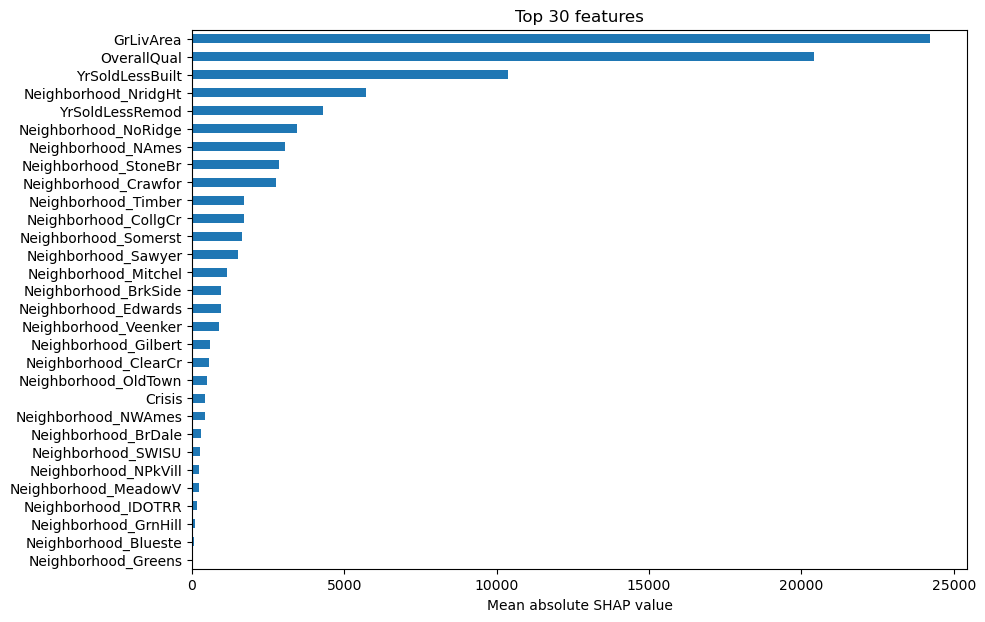

In [26]:
# Plot the top 30 features
mean_shap_values.head(30).plot(kind='barh', figsize=(10, 7))
plt.xlabel('Mean absolute SHAP value')
plt.title('Top 30 features')
plt.gca().invert_yaxis()
plt.show()